In [1]:
# grafics.py

import pandas as pd
import seaborn as sns

In [31]:
bsr_df = pd.read_csv("../bsr_df.csv")
bsr_tfidf = pd.read_csv("../bsr_tfidf.csv")
tcr_df = pd.read_csv("../tcr_df.csv")
tcr_tfidf = pd.read_csv("../tcr_tfidf.csv")

dados = pd.concat([
    bsr_df,
    bsr_tfidf,
    tcr_df,
    tcr_tfidf
])

dados.Score = dados.Score.str.replace(',', '.').astype(float)
dados.Benchmark = dados.Benchmark.str.removeprefix("jv.microbenchmark.runners.tfidf.")
dados["Class"] = dados.Benchmark.str.split("Runner.").str[0]
dados["Benchmark"] = dados.Benchmark.str.split("Runner.").str[1]
dados.dropna(subset = ['Score'], inplace=True) 
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88 entries, 0 to 21
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Benchmark                  88 non-null     object 
 1   Mode                       88 non-null     object 
 2   Threads                    88 non-null     int64  
 3   Samples                    88 non-null     int64  
 4   Score                      88 non-null     float64
 5   Score Error (99,9%)        72 non-null     object 
 6   Unit                       88 non-null     object 
 7   Param: dataset             88 non-null     object 
 8   Param: stringManipulation  88 non-null     object 
 9   Class                      88 non-null     object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ KB


In [32]:
alvos=set(["compute_df", "compute_tfidf"])
dados[dados["Benchmark"].isin(alvos)][["Class","Benchmark", "Score", "Param: stringManipulation"]]

,Class,Benchmark,Score,Param: stringManipulation
0,BasicSerial,compute_df,0.006104,foreach_java
11,BasicSerial,compute_df,0.009601,foreach_apache
0,BasicSerial,compute_tfidf,0.005964,foreach_java
11,BasicSerial,compute_tfidf,0.009229,foreach_apache
0,ThreadConcurrent,compute_df,0.017300,foreach_java
11,ThreadConcurrent,compute_df,0.025468,foreach_apache
0,ThreadConcurrent,compute_tfidf,0.019917,foreach_java
11,ThreadConcurrent,compute_tfidf,0.029790,foreach_apache


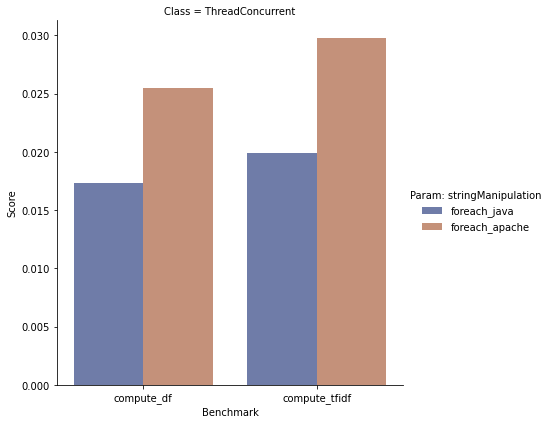

In [28]:
alvos=set(["compute_df", "compute_tfidf"])
g = sns.catplot(
    data=dados[dados["Benchmark"].isin(alvos)], kind="bar", col="Class",
    x="Benchmark", y="Score", hue="Param: stringManipulation",
    ci="sd", palette="dark", alpha=.6, height=6, sharey=False,
    # order=['BasicSerial', 'ThreadConcurrent']
)